In [1]:
import gurobipy as gp
from gurobipy import GRB
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown
import pickle
import matplotlib.pyplot as plt

In [2]:
with open("data/travel_time.pkl", "rb") as file:
    travel_time = pickle.load(file)
D = np.zeros((26,26,26))
c_matrix= travel_time.copy()
for i in range(26):
    for j in range(26):
        for k in range(26):
            D[i,j,k] = min(c_matrix[i][k]+c_matrix[k][i],c_matrix[j][k]+c_matrix[k][j],c_matrix[j][k]+c_matrix[k][i]-c_matrix[j][i],c_matrix[i][k]+c_matrix[k][j]-c_matrix[i][j])
            if D[i,j,k]<0:
                D[i,j,k]=0

In [22]:
#dfbase = pd.read_pickle('base.pkl')
#dfbaset = pd.read_pickle('base_4time.pkl')#update
#dfbasetherd = pd.read_pickle('vars_basecase_time_herd.pkl')
#dfod = pd.read_pickle('base_od.pkl')
#dfodt = pd.read_pickle('base_od_4time.pkl')#update
#dfherd = pd.read_pickle('base_4time_empweighted_500lambda.pkl')
#dfrand = pd.read_pickle('vars_basecase_od_time_herd_case60100.pkl')
dfrand = pd.read_pickle('results/base_varying_lambda10.pkl')
dfrand = pd.read_pickle('RevisedResults/P2_popu.pkl')
#16876659.42004843

districts = {0: 'Antelope Valley', 
             1: 'East Valley', 
             2: 'Glendale', 
             3: 'San Fernando', 
             4: 'West Valley',
             5: 'Alhambra', 
             6: 'El Monte', 
             7: 'Foothill', 
             8: 'Pasadena', 
             9: 'Pomona',
             10: 'Central', 
             11: 'Hollywood-Wilshire', 
             12: 'Northeast', 
             13: 'West',
             14: 'Compton', 
             15: 'South', 
             16: 'Southeast', 
             17: 'Southwest',
             18: 'Bellflower', 
             19: 'East Los Angeles', 
             20: 'San Antonio', 
             21: 'Whittier',
             22: 'Harbor', 
             23: 'Inglewood', 
             24: 'Long Beach', 
             25: 'Torrance'}


In [23]:
#dfxbase = dfbase[dfbase.name=='x']
#dfybase = dfbase[dfbase.name=='y']
#dfzbase = dfbase[dfbase.name=='z']
#dfxbaset = dfbaset[dfbaset.name=='x']
#dfybaset = dfbaset[dfbaset.name=='y']
#dfzbaset = dfbaset[dfbaset.name=='z']
#dfxbasetherd = dfbasetherd[dfbasetherd.name=='x']
#dfybasetherd = dfbasetherd[dfbasetherd.name=='y']
#dfzbasetherd = dfbasetherd[dfbasetherd.name=='z']
#dfxod = dfod[dfod.name=='x']
#dfyod = dfod[dfod.name=='y']
#dfzod = dfod[dfod.name=='z']
#dfxodt = dfodt[dfodt.name=='x']
#dfyodt = dfodt[dfodt.name=='y']
#dfzodt = dfodt[dfodt.name=='z']
#dfxherd = dfherd[dfherd.name=='x']
#dfyherd = dfherd[dfherd.name=='y']
#dfzherd = dfherd[dfherd.name=='z']

dfxrand = dfrand[dfrand.name=='x']
dfyrand = dfrand[dfrand.name=='y']
dfzrand = dfrand[dfrand.name=='z']

In [24]:
total_pop = [420697,443569,344450,526877,899111,339399,419797,308499,140361,547523,354750,479505,287613,666399,278815,193899,166374,379199,356465,195082,407864,321720,201739,411617,469439,465691]


In [25]:
#print('lambda = 500')
#print(Herd500_herd)
#print('lambda = 10000')
#print(Herd10000_herd)
#print('diff')
#print(Herd10000_herd-Herd500_herd)
emp=[0.9785489423063246,
0.9749523393023726,
0.9810134958440276,
0.9715990029226316,
0.9512510687291531,
0.9793683522808072,
0.9739319327227332,
0.9817156078851325,
0.9915252477779021,
0.9678482424468472,
0.9760508448195166,
0.9657752125951641,
0.9784091897580796,
0.967984322913777,
0.9795198849727248,
0.9859672856449567,
0.9874863827092342,
0.9723956829474802,
0.9745472149882571,
0.985468457303294,
0.9697058020586842,
0.9771345654416476,
0.9898114604005365,
0.979337971566636,
0.9766137484373549,
0.9772144560727959]

In [ ]:
HL = np.array(emp)*np.array(total_pop)

In [27]:
groupedz = dfzrand.groupby(['k','t'])
resultsz = groupedz.sum()
groupedy = dfyrand.groupby(['j','t'])
resultsy = groupedy.sum()

In [28]:
sites =[3,4,6,10,18,23]
for t in range(6):
    for k in range(26):
        if k in sites:
            print('time',t)
            print('HD',k)
            print(resultsz['value'][(k,t)])
            print(resultsy['value'][(k,t)])

time 0
HD 3
315680.0
84320.0
time 0
HD 4
160546.0
239454.0
time 0
HD 6
279730.0
120270.0
time 0
HD 10
180917.0
219083.0
time 0
HD 18
231625.0
168375.0
time 0
HD 23
28014.0
371986.0
time 1
HD 3
185713.0
214287.0
time 1
HD 4
29448.0
370552.0
time 1
HD 6
396265.0
3735.0
time 1
HD 10
104320.0
295680.0
time 1
HD 18
294534.0
105466.0
time 1
HD 23
5209.0
394791.0
time 2
HD 3
9969.0
390031.0
time 2
HD 4
18936.0
231715.0
time 2
HD 6
246482.0
153518.0
time 2
HD 10
138879.0
261121.0
time 2
HD 18
104339.0
295661.0
time 2
HD 23
91179.0
308821.0
time 3
HD 3
0.0
0.0
time 3
HD 4
0.0
0.0
time 3
HD 6
280817.0
119183.0
time 3
HD 10
59787.0
340213.0
time 3
HD 18
274236.0
125764.0
time 3
HD 23
0.0
400000.0
time 4
HD 3
0.0
0.0
time 4
HD 4
0.0
0.0
time 4
HD 6
319105.0
4857.0
time 4
HD 10
31784.0
278841.0
time 4
HD 18
37209.0
225665.0
time 4
HD 23
30658.0
276456.0
time 5
HD 3
0.0
14963.0
time 5
HD 4
6565.0
0.0
time 5
HD 6
46766.0
8038.0
time 5
HD 10
11451.0
15394.0
time 5
HD 18
14783.0
1438.0
time 5
HD 23
131

In [29]:
score = 0
groupedz = dfzrand.groupby(['i', 'j','k'])
resultsz = groupedz.sum()
groupedy = dfyrand.groupby(['i', 'j'])
resultsy = groupedy.sum()
for i in range(26):
    for j in range(26):
        score += resultsy['value'][(i,j)]*(2*travel_time[i][j])
        for k in range(26):     
            score += resultsz['value'][(i,j,k)]*D[i][j][k]
#This is inconvience
print(score)
ics = score.copy()

200576765.96


# Base model + OD + 6 periods + 60% herd imunity

In [11]:
'''
flow_matrix = np.zeros((26,26,6))
flow_matrix_od = np.zeros((26,26,26,6))
for t in range(6):
    for i in range(26):
        for j in range(26):
            new = dfyrand[dfyrand['i']==i]
            new = new[new['j']==j]
            new = new[new['t']==t]
            flow_matrix[i,j,t] = sum(new.value)
            for k in range(26):
                new2 = dfzrand[dfzrand['i']==i]
                new2 = new2[new2['j']==j]
                new2 = new2[new2['k']==k]
                new2 = new2[new2['t']==t]
                flow_matrix_od[i,j,k,t] = sum(new2.value)
'''
flow_matrix = np.zeros((26,26,6))
flow_matrix_od = np.zeros((26,26,26,6))
groupedz = dfzrand.groupby(['t','i', 'j','k'])
resultsz = groupedz.sum()
groupedy = dfyrand.groupby(['t','i', 'j'])
resultsy = groupedy.sum()
for t in range(6):
    for i in range(26):
        for j in range(26):
            flow_matrix[i,j,t] = resultsy['value'][(t,i,j)]
            for k in range(26):     
                flow_matrix_od[i,j,k,t] = resultsz['value'][(t,i,j,k)]
sites = list(dfxrand[dfxrand.value==1].i)

indices = np.arange(len(districts))
index_names = [districts[i] for i in indices]
categories = []
values = np.zeros((5,6))
sites_map = {}
count = 0
for site in sites:
    print(districts[site])
    sites_map[site]=count
    count+=1
    categories.append(districts[site])
    #print(np.sum(flow_matrix[:,site,:])+np.sum(flow_matrix_od[:,:,site,:]))
    #values.append(np.sum(flow_matrix[:,site,:])+np.sum(flow_matrix_od[:,:,site,:]))
print('more smooth')

San Fernando
West Valley
El Monte
Central
Bellflower
Inglewood
more smooth


In [12]:
flow_matrix1 = np.zeros((26,26,6))
flow_matrix_od1 = np.zeros((26,26,26,6))
groupedz = dfzrand.groupby(['t','i', 'j','k'])
resultsz = groupedz.sum()
groupedy = dfyrand.groupby(['t','i', 'j'])
resultsy = groupedy.sum()
for t in range(6):
    for i in range(26):
        for j in range(26):
            flow_matrix1[i,j,t] = resultsy['value'][(t,i,j)]
            for k in range(26):     
                flow_matrix_od1[i,j,k,t] = resultsz['value'][(t,i,j,k)]



In [11]:
np.sum(flow_matrix_od1-flow_matrix_od)

0.0

In [12]:
#print(np.where(flow_matrix[0]>0)[0][0])
first = 0
second = 0
third = 0
fourth = 0
fifth = 0
for site in list(districts.keys()):
    candiates = travel_time[site,:].copy()
    for vac_site in sites:
        candiates[vac_site] -= 1000
    sorted_indices = np.argsort(candiates)
    index1 = sorted_indices[0]
    index2 = sorted_indices[1]
    index3 = sorted_indices[2]
    index4 = sorted_indices[4]
    index5 = sorted_indices[5]
    percentage = 100*np.sum(flow_matrix[site,index1,:])/np.sum(flow_matrix[site])
    values[0,sites_map[index1]] += np.sum(flow_matrix[site,index1,:])
    values[1,sites_map[index2]] += np.sum(flow_matrix[site,index2,:])
    values[2,sites_map[index3]] += np.sum(flow_matrix[site,index3,:])
    values[3,sites_map[index4]] += np.sum(flow_matrix[site,index4,:])
    values[4,sites_map[index5]] += np.sum(flow_matrix[site,index5,:])
    percentage2 = 100*np.sum(flow_matrix[site,index2,:])/np.sum(flow_matrix[site])
    percentage3 = 100*np.sum(flow_matrix[site,index3,:])/np.sum(flow_matrix[site])
    first += np.sum(flow_matrix[site,index1,:])
    second += np.sum(flow_matrix[site,index2,:])
    third += np.sum(flow_matrix[site,index3,:])
    fourth += np.sum(flow_matrix[site,index4,:])
    fifth += np.sum(flow_matrix[site,index5,:])
    if percentage>100:
        print(districts[site])
        print(site)
        #print('preferred',districts[np.argmin(travel_time[site,:])])
        #print('actual',districts[np.where(flow_matrix[site]>0)[0][0]])
        print(percentage,'% go to closest vaccination site')
        print(percentage2,'% go to second closest vaccination site')
        print(percentage3,'% go to third closest vaccination site')


In [13]:
with open("data/travel_time.pkl", "rb") as file:
    c_m_v = pickle.load(file)

In [14]:
first_od = 0
second_od = 0
third_od = 0
fourth_od = 0
fifth_od = 0
first_odo = 0
second_odo = 0
third_odo = 0
fourth_odo = 0
fifth_odo = 0
first_odd = 0
second_odd = 0
third_odd = 0
fourth_odd = 0
fifth_odd = 0
for site in list(districts.keys()):
    for site2 in list(districts.keys()):
        candiates2 = D[site,site2,:].copy()
        candiates2[site] = -1
        for vac_site in sites:
            candiates2[vac_site] -= 1000
        sorted_indices = np.argsort(candiates2)
        index1 = sorted_indices[0]
        index2 = sorted_indices[1]
        index3 = sorted_indices[2]
        index4 = sorted_indices[3]
        index5 = sorted_indices[4]
        if np.sum(flow_matrix_od[site,site2])>0:
            percentage_route = 100*(np.sum(flow_matrix_od[site,site2,index1]))/np.sum(flow_matrix_od[site,site2])
        else:
            percentage_route = 100
        if np.sum(flow_matrix_od[site,site2])>0:
            percentage_route2 = 100*(np.sum(flow_matrix_od[site,site2,index2]))/np.sum(flow_matrix_od[site,site2])
        else:
            percentage_route2 = 100
        if np.sum(flow_matrix_od[site,site2])>0:
            percentage_route3 = 100*(np.sum(flow_matrix_od[site,site2,index3]))/np.sum(flow_matrix_od[site,site2])
        else:
            percentage_route3 = 100  
        if np.sum(flow_matrix_od[site,site2])>0:
            percentage_route4 = 100*(np.sum(flow_matrix_od[site,site2,index4]))/np.sum(flow_matrix_od[site,site2])
        else:
            percentage_route4 = 100 
        if np.sum(flow_matrix_od[site,site2])>0:
            percentage_route5 = 100*(np.sum(flow_matrix_od[site,site2,index5]))/np.sum(flow_matrix_od[site,site2])
        else:
            percentage_route5 = 100 
        first_od += np.sum(flow_matrix_od[site,site2,index1])
        if c_m_v[site,index1]<c_m_v[site2,index1]:
            first_odo += np.sum(flow_matrix_od[site,site2,index1])
        else:
            first_odd += np.sum(flow_matrix_od[site,site2,index1])
        if index2 == site2:
            values[0,sites_map[index1]] += np.sum(flow_matrix_od[site,site2,index1])
            values[0,sites_map[index2]] += np.sum(flow_matrix_od[site,site2,index2])
            values[1,sites_map[index3]] += np.sum(flow_matrix_od[site,site2,index3])
            values[2,sites_map[index4]] += np.sum(flow_matrix_od[site,site2,index4])
            values[3,sites_map[index5]] += np.sum(flow_matrix_od[site,site2,index5])
            first_od += np.sum(flow_matrix_od[site,site2,index2])
            if c_m_v[site,index2]<c_m_v[site2,index2]:
                first_odo += np.sum(flow_matrix_od[site,site2,index2])
            else:
                first_odd += np.sum(flow_matrix_od[site,site2,index2])
            second_od += np.sum(flow_matrix_od[site,site2,index3])
            if c_m_v[site,index2]<c_m_v[site2,index3]:
                second_odo += np.sum(flow_matrix_od[site,site2,index3])
            else:
                second_odd += np.sum(flow_matrix_od[site,site2,index3])
            third_od += np.sum(flow_matrix_od[site,site2,index4])
            if c_m_v[site,index3]<c_m_v[site2,index4]:
                third_odo += np.sum(flow_matrix_od[site,site2,index4])
            else:
                third_odd += np.sum(flow_matrix_od[site,site2,index4])
            fourth_od += np.sum(flow_matrix_od[site,site2,index5])
            if c_m_v[site,index4]<c_m_v[site2,index5]:
                fourth_odo += np.sum(flow_matrix_od[site,site2,index5])
            else:
                fourth_odd += np.sum(flow_matrix_od[site,site2,index5])
        else:
            values[0,sites_map[index1]] += np.sum(flow_matrix_od[site,site2,index1])
            values[1,sites_map[index2]] += np.sum(flow_matrix_od[site,site2,index2])
            values[2,sites_map[index3]] += np.sum(flow_matrix_od[site,site2,index3])
            values[3,sites_map[index4]] += np.sum(flow_matrix_od[site,site2,index4])
            values[4,sites_map[index5]] += np.sum(flow_matrix_od[site,site2,index5])
            second_od += np.sum(flow_matrix_od[site,site2,index2])
            if c_m_v[site,index2]<c_m_v[site2,index2]:
                second_odo += np.sum(flow_matrix_od[site,site2,index2])
            else:
                second_odd += np.sum(flow_matrix_od[site,site2,index2])
            third_od += np.sum(flow_matrix_od[site,site2,index3])
            if c_m_v[site,index3]<c_m_v[site2,index3]:
                third_odo += np.sum(flow_matrix_od[site,site2,index3])
            else:
                third_odd += np.sum(flow_matrix_od[site,site2,index3])
            fourth_od += np.sum(flow_matrix_od[site,site2,index4])
            if c_m_v[site,index4]<c_m_v[site2,index4]:
                fourth_odo += np.sum(flow_matrix_od[site,site2,index4])
            else:
                fourth_odd += np.sum(flow_matrix_od[site,site2,index4])
            fifth_od += np.sum(flow_matrix_od[site,site2,index5])
            if c_m_v[site,index5]<c_m_v[site2,index5]:
                fifth_odo += np.sum(flow_matrix_od[site,site2,index5])
            else:
                fifth_odd += np.sum(flow_matrix_od[site,site2,index5])
        if percentage_route>100:
            print('OD pair '+districts[site]+' to '+districts[site2])
            if percentage_route>0:
                print(percentage_route,'% go to closest vaccination site')
            if percentage_route2>0:
                print(percentage_route2,'% go to second closest vaccination site')
            if percentage_route3>0:
                print(percentage_route3,'% go to third closest vaccination site')
            if percentage_route4>0:
                print(percentage_route4,'% go to fourth closest vaccination site')
            if percentage_route5>0:
                print(percentage_route5,'% go to fourth closest vaccination site')

In [15]:
#print('Overall,\n\n for non-communters,\n',100*first/np.sum(flow_matrix),'% people go to closest vaccine site;\n',100*second/np.sum(flow_matrix),'% people go to second closest vaccine site;\n',100*third/np.sum(flow_matrix),'% people go to third closest vaccine site;\n')
#print('for communters,\n',100*first_od/np.sum(flow_matrix_od),'% people go to closest vaccine site;\n',100*second_od/np.sum(flow_matrix_od),'% people go to second closest vaccine site;\n',100*third_od/np.sum(flow_matrix_od),'% people go to third closest vaccine site;\n',100*fifth_od/np.sum(flow_matrix_od),'% people go to fifth closest vaccine site;\n')
print(100*(first+first_odo)/sum(total_pop),'% people go to closest vaccine site;')
print(100*(first_odd)/sum(total_pop),'% people go to closest (D) vaccine site;\n')
print(100*(second+second_odo)/sum(total_pop),'% people go to 2nd closest vaccine site;')
print(100*(second_odd)/sum(total_pop),'% people go to 2nd closest (D) vaccine site;\n')
print(100*(third+third_odo)/sum(total_pop),'% people go to 3rd closest vaccine site;')
print(100*(third_odd)/sum(total_pop),'% people go to 3rd closest (D) vaccine site;\n')
print(100*(fourth+fourth_odo)/sum(total_pop),'% people go to 4th closest vaccine site;')
print(100*(fourth_odd)/sum(total_pop),'% people go to 4th closest (D) vaccine site;\n')
print(100*(fifth+fifth_odo)/sum(total_pop),'% people go to 5th closest vaccine site;')
print(100*(fifth_odd)/sum(total_pop),'% people go to 5th closest (D) vaccine site;\n')
(first+first_odo+first_odd)/sum(total_pop)

68.541280895519 % people go to closest vaccine site;
19.27497996799267 % people go to closest (D) vaccine site;

7.386499753551954 % people go to 2nd closest vaccine site;
3.3910094236706216 % people go to 2nd closest (D) vaccine site;

0.9850740850155 % people go to 3rd closest vaccine site;
0.20576566750318706 % people go to 3rd closest (D) vaccine site;

0.11075700342314442 % people go to 4th closest vaccine site;
0.07232866175818489 % people go to 4th closest (D) vaccine site;

0.016516307759453144 % people go to 5th closest vaccine site;
0.015788233806288843 % people go to 5th closest (D) vaccine site;



0.8781626086351166

In [16]:
sum(values[1])/np.sum(values)

0.1102124440006407

In [17]:
0.26*sum(total_pop)

2606878.04

In [18]:
dfrand = pd.read_pickle('results/base_p0.pkl')
dfrand1 = pd.read_pickle('RevisedResults/P2_emp.pkl')

dfxrand = dfrand[dfrand.name=='x']
dfyrand = dfrand[dfrand.name=='y']
dfzrand = dfrand[dfrand.name=='z']
score1 = np.zeros(26)
groupedz = dfzrand.groupby(['i', 'j','k'])
resultsz = groupedz.sum()
groupedy = dfyrand.groupby(['i', 'j'])
resultsy = groupedy.sum()
for i in range(26):
    for j in range(26):
        score1[i] += resultsy['value'][(j,i)]*(2*travel_time[j][i])
        for k in range(26):     
            score1[i] += resultsz['value'][(j,k,i)]*D[j][k][i]
print(sum(score1))
minutes_traveled = []
for site in sites:
    minutes_traveled.append(score1[site])
    
dfxrand1 = dfrand1[dfrand1.name=='x']
dfyrand1 = dfrand1[dfrand1.name=='y']
dfzrand1 = dfrand1[dfrand1.name=='z']
score2 = np.zeros(26)
groupedz1 = dfzrand1.groupby(['i', 'j','k'])
resultsz1 = groupedz1.sum()
groupedy1 = dfyrand1.groupby(['i', 'j'])
resultsy1 = groupedy1.sum()
for i in range(26):
    for j in range(26):
        score2[i] += resultsy1['value'][(j,i)]*(2*travel_time[j][i])
        for k in range(26):     
            score2[i] += resultsz1['value'][(j,k,i)]*D[j][k][i]
print(sum(score2))
minutes_traveled_1 = []
for site in sites:
    minutes_traveled_1.append(score2[site])
print(ics)

276949554.9866667
287587943.235
287587943.2350001


In [19]:
values1=values.copy()

In [20]:
#plt.figure()  # Set figure size and DPI for high resolution
fig, ax = plt.subplots(figsize=(8, 6), dpi=1200)
pos = np.arange(len(categories))
bar_width = 0.35


ax.bar(pos-bar_width/2, values1[0],bar_width, color='navajowhite')
#ax.bar(pos-bar_width/2, values1[1],bar_width, bottom=values[0], color='navajowhite')
#ax.bar(pos-bar_width/2, values1[2],bar_width, bottom=values[1]+values[0], color='navajowhite')

ax.bar(pos+bar_width/2, values[0],bar_width, color='yellowgreen')
ax.bar(pos+bar_width/2, values[1],bar_width, bottom=values[0], color='thistle')
ax.bar(pos+bar_width/2, values[2],bar_width, bottom=values[1]+values[0], color='thistle')

#plt.bar(categories, values[1], bottom=values[0], color='yellowgreen')
#plt.bar(categories, values[2], bottom=values[1]+values[0], color='thistle')


ax.set_xlabel('Mega Sites',fontsize=18)
ax.set_ylabel('Travel Inconvenience (Minutes)',fontsize=18)
#ax.title('Bar Plot Example')
ax.set_xticks(pos)
ax.set_xticklabels(categories)
ax.legend(['P0','P2','P2-Not Closest'])
plt.xticks(rotation=45,fontsize=16)  # Rotate the x-axis labels if needed
plt.yticks(fontsize=16)
plt.tight_layout()  # Adjust layout to prevent label clipping
plt.ylim(-1, 5000000)
#plt.legend(['closest', '2nd closest', '3rd closest'])
#plt.savefig('bar_plot_grouped.pdf', dpi=1200, bbox_inches='tight')  # Save as a high-resolution image


(-1.0, 5000000.0)

In [21]:
#plt.figure()  # Set figure size and DPI for high resolution
fig, ax = plt.subplots(figsize=(8, 6), dpi=1200)
pos = np.arange(len(categories))
bar_width = 0.35


ax.bar(pos-bar_width/2, minutes_traveled,bar_width, color='navajowhite')
ax.bar(pos+bar_width/2, minutes_traveled_1,bar_width, color='yellowgreen')

#plt.bar(categories, values[1], bottom=values[0], color='yellowgreen')
#plt.bar(categories, values[2], bottom=values[1]+values[0], color='thistle')


ax.set_xlabel('Mega Sites',fontsize=18)
ax.set_ylabel('Travel Inconvenience (Minutes)',fontsize=18)
#ax.title('Bar Plot Example')
ax.set_xticks(pos)
ax.set_xticklabels(categories)
ax.legend(['P0','P2'])
plt.xticks(rotation=45,fontsize=16)  # Rotate the x-axis labels if needed
plt.yticks(fontsize=16)
plt.tight_layout()  # Adjust layout to prevent label clipping
#ax.ylim(-1, 80000000)
#plt.legend(['closest', '2nd closest', '3rd closest'])
#plt.savefig('RevisedResults/bar_plot_grouped.pdf', dpi=1200, bbox_inches='tight')  # Save as a high-resolution image


In [22]:
196,572,213

(196, 572, 213)

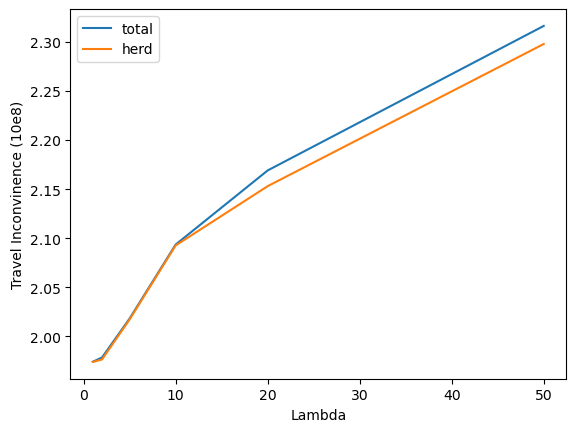

In [23]:
lambda_ = np.array([1,2,5,10,20,50])
total_travel = np.array([197406863,197842052,201815975,209351232,216904035,231634306])
total_score = np.array([17451035,17500705,16948488,16352128,16523677,15900059])
total_infection = np.array([402476,402612,403176,405431,405323,405119])
herd_travel = np.array([197389518,197637565,201724792,209260624,215302070,229792389])
herd_score = np.array([17302595,17257957,16666657,16257549,16209549,15547756])
herd_infection = np.array([401215,402393,403206,405582,405384,405169])
import matplotlib.pyplot as plt


plt.plot(lambda_, total_travel/100000000,label='total')
plt.plot(lambda_, herd_travel/100000000,label='herd')
plt.xlabel("Lambda")
plt.ylabel("Travel Inconvinence (10e8)")
plt.legend()
plt.show()

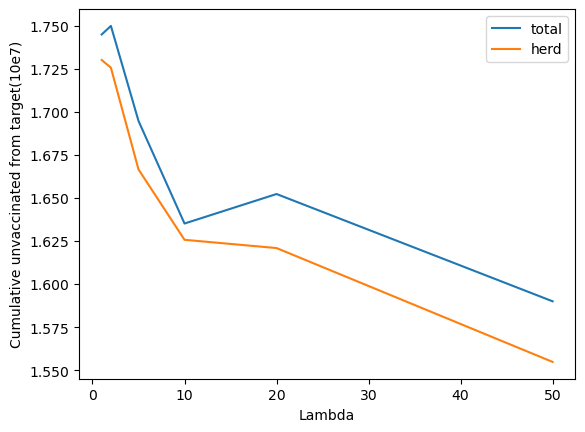

In [24]:
plt.plot(lambda_, total_score/10000000,label='total')
plt.plot(lambda_, herd_score/10000000,label='herd')
plt.xlabel("Lambda")
plt.ylabel("Cumulative unvaccinated from target(10e7)")
plt.legend()
plt.show()

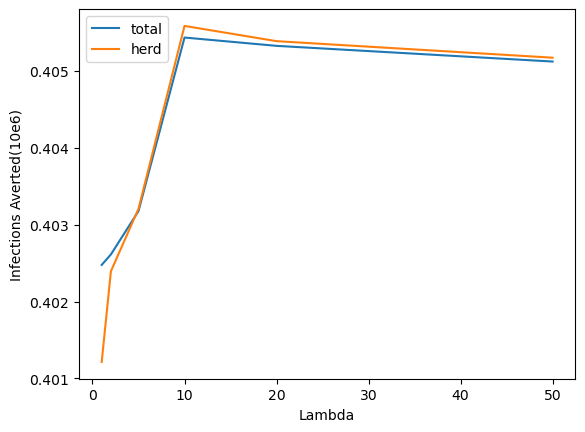

In [25]:
plt.plot(lambda_, total_infection/1000000,label='total')
plt.plot(lambda_, herd_infection/1000000,label='herd')
plt.xlabel("Lambda")
plt.ylabel("Infections Averted(10e6)")
plt.legend()
plt.show()

In [26]:
((2.85-2.24)*10**8)/sum(total_pop)

6.083905636030444

In [27]:
((2.85-2.24)*(10**8))

60999999.999999985

In [28]:
target = emp*np.array(total_pop)
target

array([411672.60438144, 432458.63419201, 337910.09864348, 511913.16786287,
       855280.29965614, 332396.63939575, 408853.70356121, 302858.28331696,
       139171.47530335, 529919.17324923, 346254.03719972, 463094.04331544,
       281403.20229389, 645063.78480542, 273104.83672867, 191178.07071927,
       164292.05943687, 368731.470578  , 347391.97299079, 192247.15758764,
       395508.08725086, 314363.73239389, 199683.57420974, 403112.15784234,
       458460.58145268, 455079.977263  ])

In [29]:
groupedz = dfzrand.groupby(['t', 'i'])
resultsz = groupedz.sum()
groupedy = dfyrand.groupby(['t', 'i'])
resultsy = groupedy.sum()


In [30]:
score = 0
help_ = np.zeros(26)
for t in range(6):
    for i in range(26):
        help_[i] += (resultsz['value'][(t,i)]+resultsy['value'][(t,i)])
        score += max(0,target[i]-help_[i])
print(score)
print(ics)

24508729.92985982
287587943.2350001


In [31]:
89127941/sum(total_pop)

8.889278402912934

In [32]:
c_m_v.shape

(26, 26)

In [33]:
vac_rate = np.zeros((6,26))
for t in range(6):
    for hd in range(26):
        if t == 0:
            vac_rate[t,hd]= resultsy['value'][(t,hd)]+resultsz['value'][(t,hd)]
        else:
            vac_rate[t,hd]= vac_rate[t-1,hd]+resultsy['value'][(t,hd)]+resultsz['value'][(t,hd)]
for t in range(6):
    for hd in range(26):
        vac_rate[t,hd] = vac_rate[t,hd]/total_pop[hd]

In [34]:
vac_rate

array([[0.        , 0.10201344, 0.        , 0.75919048, 0.11023222,
        0.        , 0.18647108, 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.399759  , 0.        ,
        0.        , 0.        , 0.35232424, 1.        , 0.        ,
        0.10673901, 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.95080307, 0.27746303, 0.93533459, 0.75919048, 0.11023222,
        1.        , 0.18647108, 0.19643824, 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.399759  , 1.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.10673901, 1.        , 0.        , 0.02822284, 0.07193267,
        0.14106135],
       [1.        , 0.27746303, 1.        , 1.        , 0.11023222,
        1.        , 0.18647108, 0.62438128, 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.399759  , 1.        ,
        1.        , 0.32449181, 1.        , 1.        , 0.        ,
      

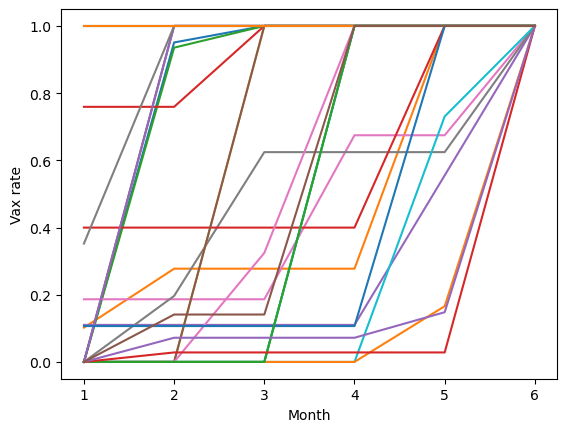

In [35]:
month = [1,2,3,4,5,6]
for hd in range(26):
    plt.plot(month, vac_rate[:,hd],label=districts[hd])
plt.xlabel("Month")
plt.ylabel("Vax rate")
#plt.legend()
plt.show()

month = [1,2,3,4,5,6]
models =['results/base_od_4time.pkl','results/base_od_4time_real.pkl','results/base_od_4time_emp_10lambda_odweighted.pkl','results/actual_od_4time_emp_10lambda_odweighted.pkl']
names = ['base model','base model with actual locations','our model','our model with actual locations']
for (model,name) in zip(models,names):
    dfrand = pd.read_pickle(model)
    dfxrand = dfrand[dfrand.name=='x']
    dfyrand = dfrand[dfrand.name=='y']
    dfzrand = dfrand[dfrand.name=='z']
    groupedz = dfzrand.groupby(['t', 'i'])
    resultsz = groupedz.sum()
    groupedy = dfyrand.groupby(['t', 'i'])
    resultsy = groupedy.sum()
    vac_rate = np.zeros((6,26))
    mean_vac_rate = np.zeros(6)
    for t in range(6):
        for hd in range(26):
            if t == 0:
                vac_rate[t,hd]= resultsy['value'][(t,hd)]+resultsz['value'][(t,hd)]
            else:
                vac_rate[t,hd]= vac_rate[t-1,hd]+resultsy['value'][(t,hd)]+resultsz['value'][(t,hd)]
    for t in range(6):
        for hd in range(26):
            vac_rate[t,hd] = vac_rate[t,hd]/total_pop[hd]
        mean_vac_rate[t] = np.mean(vac_rate[t])
    plt.plot(month, mean_vac_rate,label=name)
plt.xlabel("Month")
plt.ylabel("Mean Vax rate")
plt.legend()
plt.show()

month = [1,2,3,4,5,6]
models =['results/base_od_4time.pkl','results/base_od_4time_real.pkl','results/base_od_4time_emp_10lambda_odweighted.pkl','results/actual_od_4time_emp_10lambda_odweighted.pkl']
names = ['base model','base model with actual locations','our model','our model with actual locations']
for (model,name) in zip(models,names):
    dfrand = pd.read_pickle(model)
    dfxrand = dfrand[dfrand.name=='x']
    dfyrand = dfrand[dfrand.name=='y']
    dfzrand = dfrand[dfrand.name=='z']
    groupedz = dfzrand.groupby(['t', 'i'])
    resultsz = groupedz.sum()
    groupedy = dfyrand.groupby(['t', 'i'])
    resultsy = groupedy.sum()
    vac_rate = np.zeros((6,26))
    mean_vac_rate = np.zeros(6)
    for t in range(6):
        for hd in range(26):
            if t == 0:
                vac_rate[t,hd]= resultsy['value'][(t,hd)]+resultsz['value'][(t,hd)]
            else:
                vac_rate[t,hd]= vac_rate[t-1,hd]+resultsy['value'][(t,hd)]+resultsz['value'][(t,hd)]
    for t in range(6):
        for hd in range(26):
            vac_rate[t,hd] = vac_rate[t,hd]/total_pop[hd]
        mean_vac_rate[t] = np.std(vac_rate[t])
    plt.plot(month, mean_vac_rate,label=name)
plt.xlabel("Month")
plt.ylabel("Std Vax rate")
plt.legend()
plt.show()

month = [1,2,3,4,5,6]
models =['results/base_od_4time_emp_50lambda_caseweighted.pkl','results/base_od_4time_real.pkl','results/base_od_4time_emp_10lambda_odweighted_new.pkl','results/actual_od_4time_emp_10lambda_odweighted.pkl']
names = ['base model','base model with actual locations','our model','our model with actual locations']
for (model,name) in zip(models,names):
    dfrand = pd.read_pickle(model)
    dfxrand = dfrand[dfrand.name=='x']
    dfyrand = dfrand[dfrand.name=='y']
    dfzrand = dfrand[dfrand.name=='z']
    groupedz = dfzrand.groupby(['t', 'i'])
    resultsz = groupedz.sum()
    groupedy = dfyrand.groupby(['t', 'i'])
    resultsy = groupedy.sum()
    vac_rate = np.zeros((6,26))
    for t in range(6):
        for hd in range(26):
            vac_rate[t,hd]= resultsy['value'][(t,hd)]+resultsz['value'][(t,hd)]
            #vac_rate[t,hd] = vac_rate[t,hd]/total_pop[hd]
    print(max(vac_rate[0])-min(vac_rate[0])+max(vac_rate[1])-min(vac_rate[1]))


In [21]:
total_pop = [420697,443569,344450,526877,899111,339399,419797,308499,140361,547523,354750,479505,287613,666399,278815,193899,166374,379199,356465,195082,407864,321720,201739,411617,469439,465691]


month = [1,2,3,4,5,6]
models =['RevisedResults/P2_popu.pkl']
#models =['Results/base_p0.pkl']
names = ['base model']
for (model,name) in zip(models,names):
    dfrand = pd.read_pickle(model)
    dfxrand = dfrand[dfrand.name=='x']
    dfyrand = dfrand[dfrand.name=='y']
    dfzrand = dfrand[dfrand.name=='z']
    groupedz = dfzrand.groupby(['t', 'i'])
    resultsz = groupedz.sum()
    groupedy = dfyrand.groupby(['t', 'i'])
    resultsy = groupedy.sum()
    vac_rate = np.zeros((6,26))
    for t in range(6):
        for hd in range(26):
            if t == 0:
                vac_rate[t,hd]= (resultsy['value'][(t,hd)]+resultsz['value'][(t,hd)])/total_pop[hd]
            else:
                vac_rate[t,hd]= vac_rate[t-1,hd]+(resultsy['value'][(t,hd)]+resultsz['value'][(t,hd)])/total_pop[hd]
            #vac_rate[t,hd] = vac_rate[t,hd]/total_pop[hd]
    print(max(vac_rate[0])-min(vac_rate[0])+max(vac_rate[1])-min(vac_rate[1]))
    print(max(vac_rate[0])-min(vac_rate[0]))
    print(max(vac_rate[1])-min(vac_rate[1]))


0.0382423130646789
3.651278889249543e-05
0.038205800275786406


In [55]:
districts[10]

'Central'

In [56]:
vac_rate[0]

array([0.97854988, 0.61629194, 0.        , 0.00216749, 0.        ,
       0.01146733, 0.49267146, 0.35625723, 0.        , 0.96784793,
       0.14271459, 0.        , 0.        , 0.24336921, 0.        ,
       0.        , 0.        , 0.        , 0.38648114, 0.0094063 ,
       0.        , 0.1628932 , 0.        , 0.        , 0.97661464,
       0.        ])

In [57]:
vac_rate[1]

array([0.97854988, 0.73873512, 0.01003629, 0.71840866, 0.43662351,
       0.13217187, 0.97393264, 0.98171793, 0.01377876, 0.96784793,
       0.9591938 , 0.        , 0.        , 0.90018893, 0.00498538,
       0.        , 0.        , 0.        , 0.97454729, 0.0094063 ,
       0.        , 0.77021945, 0.        , 0.00156942, 0.97661464,
       0.        ])

In [40]:
vac_rate[1]

array([0.69018082, 0.69018123, 0.20679925, 0.69017627, 0.50493543,
       0.54836048, 0.69018121, 0.69018052, 0.20680958, 0.69018105,
       0.690179  , 0.20679451, 0.20679524, 0.69017961, 0.20679303,
       0.20679323, 0.20679313, 0.20679379, 0.69017996, 0.23276366,
       0.20679442, 0.6901809 , 0.2067969 , 0.20679904, 0.69018126,
       0.20679378])

In [41]:
sum(dfzrand[dfzrand.i==1][dfzrand.t==0]['value'])+sum(dfyrand[dfyrand.i==1][dfyrand.t==0]['value'])

/var/folders/b3/kkdtnh4d4gjgrk45d_yrf4100000gn/T/ipykernel_12179/276542505.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sum(dfzrand[dfzrand.i==1][dfzrand.t==0]['value'])+sum(dfyrand[dfyrand.i==1][dfyrand.t==0]['value'])
/var/folders/b3/kkdtnh4d4gjgrk45d_yrf4100000gn/T/ipykernel_12179/276542505.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sum(dfzrand[dfzrand.i==1][dfzrand.t==0]['value'])+sum(dfyrand[dfyrand.i==1][dfyrand.t==0]['value'])


180735.0

In [42]:
sum(vac_rate[5])

26.0

In [43]:
resultsy['value'][(0,2)]+resultsz['value'][(0,2)]

20685.0

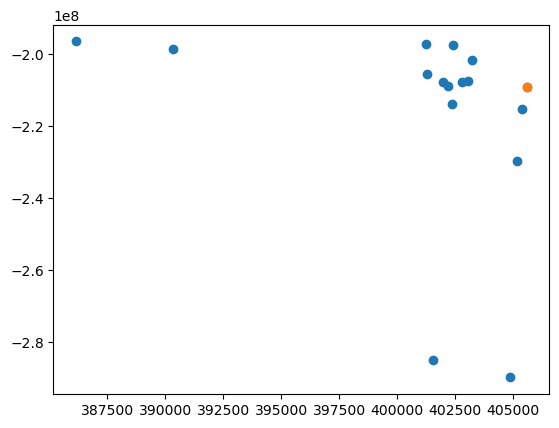

In [44]:
# baseline (4) varying lambda (5) varying delta (5) smooth (2)
infections = [386145,401535,405582,404857,
             401215,402393,403206,405384,405169,
             390323,401968,402182,401255,403061,
             402360,402767]
transpotation = [-196572213,-285049637,-209260624,-289945875,
                -197389518,-197637565,-201724792,-215302070,-229792389,
                -198734315,-207929881,-208945100,-205524299,-207520122,
                -214064450,-207708666]
plt.scatter(infections,transpotation)
plt.scatter(infections[2],transpotation[2])

In [52]:
equity = [0,3,12320,22620,34010,95238,113729,153626,214507,384725,464405,504227,528366]

infections = [385128,400717,400830,401289,401797,403359,403583,403643,404999,408084,407553,405930,405537]
trans = [196572213,196998609,197235975,197997235,199403799,202000527,204234686,205940764,206687204,206910911,210689712,211453721,211461412]
lambda_ = [0,1,2,3,4,5,6,7,8,9,10,11,12]

In [53]:

from matplotlib import ticker

# additional code before plt.show()
plt.figure(figsize=(8, 6), dpi=1200)  # Set figure size and DPI for high resolution


plt.scatter(lambda_, infections, color='red',marker='o',lw = 2)


plt.xlabel(r'$\lambda$',fontsize=24)
plt.ylabel('Number of Infections Averted',fontsize=24)
#plt.title('Bar Plot Example')
plt.xticks(fontsize=18)  # Rotate the x-axis labels if needed
plt.yticks(fontsize=18,rotation = 0)

#plt.ylim(370000, 410000)
plt.ticklabel_format( axis='y',style='sci',scilimits=(5,5))

plt.savefig('RevisedResults/infections_varying_lambda.pdf', dpi=1200)  # Save as a high-resolution image


In [47]:
od_flow = pd.read_csv('data/mean_df_20210224_20210424.csv')

value = od_flow.values[0:-1,1:-1]

In [48]:
new_value = np.zeros((26,26))
for i in range(26):
    for j in range(26):
        new_value[i,j]=value[i,j]

In [49]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8), dpi=1200)
plt.imshow(new_value,cmap='BuGn',vmin=-1000, vmax=10000)
plt.xticks(fontsize=14,rotation = 90)  # Rotate the x-axis labels if needed
plt.xticks(np.arange(26), list(districts.values()))
plt.yticks(fontsize=14,rotation = 0)
plt.yticks(np.arange(26), list(districts.values()))
cb =plt.colorbar(shrink=0.8,extend='max')
cb.set_ticks([0, 2000, 4000, 6000, 8000, 10000])
#plt.savefig('OD.pdf', dpi=1200,bbox_inches='tight')  # Save as a high-resolution image
#plt.title( "Traffic Flow" )
plt.show()


In [50]:
np.max(new_value)

169047.8447